In [1]:
import glob
import time
import timeit
import pickle
import requests
import json
import re
import numpy as np
import pandas as pd
from multiprocessing import Pool
from matplotlib import pyplot as plt
from zipfile import ZipFile
import lxml.etree as etree
import xmlschema
from pprint import pprint
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import combinations
from matplotlib.patches import Patch
import distinctipy

# If 'get_career' is a custom module you've created, keep this import

# Define 'toc' function once
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)

# Record start time
start_time = timeit.default_timer()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.gridspec as gridspec

import math
import requests
from bs4 import BeautifulSoup
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.transforms as mtransforms
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context('talk')#, font_scale=1.5)
mpl.rcParams.update({'text.usetex': False})
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
path_career='/mnt/sdb1/sandeep/000game_dev/'
path_data='/mnt/sdb1/sandeep/000game_dev/data/'

# GB_INLCUDED_OR_NOT='GB_NOT_INCLUDED'

In [246]:
# # Initialize a list to hold game details
# game_links=[]
# pagelist=[x for x in range(5)]+[x for x in range(10,15)]+[x for x in range(30,35)]
# for page in pagelist:
#     print(page,end='\r')
#     # URL of the page to scrape
#     url = "https://www.mobygames.com/game/platform:windows/sort:moby_score/page:"+str(page)+"/"
#     response = requests.get(url)

#     # Check if the request was successful
#     if response.status_code == 200:
#         # Parse the content of the page
#         soup = BeautifulSoup(response.content, 'html.parser')
#     else:
#         print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
#     link_start='https://www.mobygames.com/game/'
#     import re
#     X=str(response.content)
#     res = [i for i in range(len(X)) if X.startswith(link_start, i)]
#     for it in range(7,18+7):
#         game_links.append(X[res[it]:res[it]+200].split(',')[0][0:-1])
# game_links=np.unique(game_links)

In [2]:
# len(res)
# game_links=[]

# for it in range(0,len(res)):
#     game_links.append(X[res[it]:res[it]+200].split(',')[0][0:-1])
game_links=['https://www.mobygames.com/game/136046/disco-elysium/']
len(game_links)

1

# Parallel scraping


In [3]:
import requests
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed

def fetch_and_parse(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None



# download credits of game

In [4]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import time

total_urls = len(game_links)
processed_urls = 0
gamesoup_dict = {}  # Dictionary to store game link and corresponding soup

# Function to fetch and parse the content of the URL
def fetch_and_parse_url(url):
    """
    Fetches the content of the given URL and parses it with BeautifulSoup.
    Returns a BeautifulSoup object or None if the request fails.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return url,BeautifulSoup(response.content, 'html.parser')
    else:
        print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
        return None

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_and_parse_url, url+'credits/windows/'): url for url in urls}

        for future in as_completed(future_to_url):
            url, soup = future.result()
            processed_urls += 1
            if soup:
                gamesoup_dict[url] = soup  # Store in dictionary with URL as key
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')

# Split game_links into smaller lists of 50 links
batch_size = 50
game_links_batches = [game_links[i:i + batch_size] for i in range(0, len(game_links), batch_size)]

# Process each batch sequentially
for batch in game_links_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 5 seconds before processing the next batch

In [5]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def SouptoRoles(gamesoup_dict, game_links):
    game_to_priorlinks={}
    RolesAndPeople={}
    for it in range(len(gamesoup_dict)):
        print(it/len(gamesoup_dict),end='\r')
        game,soup = list(gamesoup_dict.items())[it]

        td_elements = soup.find_all('td')
        hrefs = []
        roles = []

        for td_element in td_elements:
            # Extract 'a' tags, assuming they are direct children of 'td' elements
            a_tags = td_element.find_all('a')
            # Extract href attributes
            hrefs.append([a.get('href') for a in a_tags])
            # Extract text directly
            roles.append(td_element.get_text(strip=True))
        game_to_priorlinks[game]=[roles, hrefs]
        
        RolesAndPeople[game]={r:h for r,h in zip(roles[0::2],hrefs[1::2])}

    return game_to_priorlinks,RolesAndPeople

game_to_priorlinks,RolesAndPeople=SouptoRoles(gamesoup_dict, game_links)

'https://www.mobygames.com/game/117263/gris/credits/windows/'

In [115]:
# game_to_priorlinks

In [15]:

game=list(RolesAndPeople.keys())[0]
Roles=list(RolesAndPeople.values())[0]


## download prior credits  

In [39]:
it=0

roles=list(Roles.values())
if len(roles)>0:
    members=np.concatenate(roles)
else:
    members=[]
#_________________________________________
#_________________________________________
creditlinks = members.copy()
total_urls = len(creditlinks)
processed_urls = 0
soup_credits = []

# Function to process a batch of URLs
def process_batch(urls):
    global processed_urls
    with ThreadPoolExecutor(max_workers=5) as executor:
        future_to_url = {executor.submit(fetch_and_parse, url): url for url in urls}

        for future in as_completed(future_to_url):
            soup = future.result()
            processed_urls += 1
            if soup:
                soup_credits.append(str(soup))
            print(f"Processed {processed_urls}/{total_urls} URLs", end='\r')

# Split creditlinks into smaller lists of 50 links
batch_size = 50
creditlink_batches = [creditlinks[i:i + batch_size] for i in range(0, len(creditlinks), batch_size)]

# Process each batch sequentially
for batch in creditlink_batches:
    process_batch(batch)
    time.sleep(5)  # Wait for 3 seconds before retrying

with open(path_data+'PriorCreditsSoup_'+game.split('/')[-4]+'.pkl', 'wb') as f:
    pickle.dump(soup_credits, f)

In [57]:
def calculate_shared_credits(rcredits):
        # Extract unique credits for each member
        unique_credits = {k: set(v) for k, v in rcredits.items()}

        # Calculate shared credits
        shared_credits = {}
        for (member1, credits1), (member2, credits2) in combinations(unique_credits.items(), 2):
            shared = credits1.intersection(credits2)
            shared_credits[(member1, member2)] = len(shared)-1

        return shared_credits
def create_network(shared_credits,MIN_FILTER_COLLABS):
    G = nx.Graph()

    # Add edges with weights
    for (member1, member2), weight in shared_credits.items():
        if weight >=MIN_FILTER_COLLABS:  # Add an edge only if there are shared credits
            G.add_edge(member1, member2, weight=weight)
    return G
import matplotlib.patheffects as PathEffects


def build_and_plot_network(ax,person_to_role, role_to_color,iterations_,MIN_FILTER_COLLABS):


    # Build the network
#     G = nx.Graph()
    G = create_network(shared_credits,MIN_FILTER_COLLABS)
    for person in person_to_role:
        G.add_node(person, role=person_to_role[person])
    nodes=list(G.nodes())
    for node in nodes:
        if node not in person_to_role.keys():
            G.remove_node(node)
    # Apply colors to nodes based on roles
    node_colors = [role_to_color[person_to_role[node]] for node in G.nodes()]
    noddesize = [role_to_size[person_to_role[node]] for node in G.nodes()]
    node_colorsdict = {node:role_to_color[person_to_role[node]] for node in G.nodes()}


    # Plot the network
    pos = nx.spring_layout(G, k=nodedistance, iterations=iterations_)
#     nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, edge_color="gray")

    # Edges
    weights = [(G[u][v]['weight']/17)**.8 for u, v in G.edges()]
    for u, v in G.edges():
        G[u][v]['weight_plot']=(G[u][v]['weight']/20)**.95
#     nx.draw_networkx_edges(G, pos, alpha=0.5, width=weights,connectionstyle="arc2,rad=.4")
    for edge in G.edges():
        source, target = edge
        rad = 0.2
        arrowprops=dict(lw=G.edges[(source,target)]['weight_plot'],arrowstyle="-",color='black',
                        connectionstyle=f"arc3,rad={rad}",
                        linestyle= '-',alpha=0.2)
        plt.annotate("",xy=pos[source],xytext=pos[target],arrowprops=arrowprops)
    # Nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,alpha=.5,node_size=noddesize)    
    # Label roles at centroids
    role_positions = {role: np.mean([pos[node] for node in G if person_to_role[node] == role], axis=0) 
                      for role in roles_data.keys()}
    role_colors = {role: [node_colorsdict[node] for node in G if person_to_role[node] == role]
                      for role in roles_data.keys()}
    role_colors = {role: role_colors[role][0] if len(role_colors[role])>0 else [0,0,0]
                      for role in role_colors.keys()}
    for role, position in role_positions.items():
        col=role_colors[role]
    #     print(position,role)
        if str(position)!='nan':
            text=plt.text(position[0], position[1], role, fontsize=(35*role_to_size[role]/np.max(list(role_to_size.values())))**.3, ha='center', va='center',color=col,alpha=.7)
            text.set_path_effects([PathEffects.withStroke(linewidth=.3, foreground='white')])
    game_pretty=game.split('/')[-4].replace('-',' ').capitalize()

    plt.title(game_pretty+": Who worked with who before? On how many games?", fontsize=ff)
    legend_handles = [Patch(color=role_to_color[role], label=role) for role in unique_roles]
#     plt.legend(handles=legend_handles,bbox_to_anchor=[1,1,], loc='upper left', title='Roles', fontsize=ff-6,ncol=2)

#     plt.show()
    plt.axis('off')
    
    
def hrcredits(soup_credits,creditlinks):
    #___________________________________________________
    hcredits=[];rcredits={}
    # creditlinks[0]
    for soup_credit,p in zip(soup_credits,creditlinks):
        td_elements = soup_credit.find_all('td')
        td_elements
        # Find all <a> tags within this <td> element
        hcredit=[];rcredit=[]
        for td_element in td_elements:
            a_tags = td_element.find_all('a')
        # Extract the hrefs from each <a> tag
            hcredit.append([a.get('href') for a in a_tags])
            rcredit.append(td_element.get_text().strip())
        hcredits.append(hcredit);rcredits[p]=(rcredit);
    return hcredits,rcredits

# Plot Past collab network for a game

https://www.mobygames.com/game/136046/disco-elysium/credits/windows/
271


/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/sdb1/sandeep/miniconda3/envs/sos/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


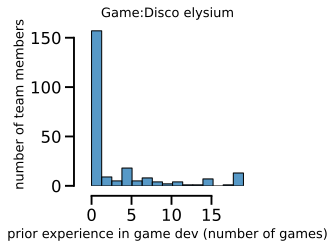

In [ ]:

it=0
GAME_FOCUS=51
# game=list(small_teams.keys())[GAME_FOCUS]
game_pretty=game.split('/')[-4].replace('-',' ').capitalize()

roles=list(Roles.values())
if len(roles)>0:
    members=np.concatenate(roles)
else:
    members=[]
print(game)
#_________________________________________
#_________________________________________
creditlinks = members.copy()
with open(path_data+'PriorCreditsSoup_'+game.split('/')[-4]+'.pkl', 'rb') as f:
    soup_credits=pickle.load(f)
soup_credits = [BeautifulSoup(x, 'html.parser') for x in soup_credits] 

print(len(soup_credits))
if len(soup_credits)>0:

    hcredits,rcredits=hrcredits(soup_credits,creditlinks)
    import networkx as nx
    import matplotlib.pyplot as plt
    from itertools import combinations
    # with open(path_career+'soup_credit_'+url.split('/')[-4]+'.pkl', 'wb') as f:
    #     pickle.dump(soup_credit, f)
    #___________________________________________________

    PriorWorkExp_=np.array([len(rcredits[x][0:-1:2])-1 for x in rcredits.keys()])
    PriorRoles_careers=np.array([len(rcredits[x][1:len(rcredits[x]):2])-1 for x in rcredits.keys()])

    df = pd.DataFrame(PriorWorkExp_)
    df.columns=['prior experience in game dev (number of games)']
    # Custom colors

    # Creating the bar chart
    ff = 13
    aa=3; bb=3; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=1, nrows=1, width_ratios=[1], wspace=wspace_, hspace=hspace_, height_ratios=[1])

    # Figure
    ax = fig.add_subplot(spec[0])
    ax = sns.histplot(x='prior experience in game dev (number of games)', data=df)
    plt.xticks([0,5,10,15])
    plt.ylabel('number of team members', fontsize=ff)
    plt.xlabel("prior experience in game dev (number of games)", fontsize=ff)
    plt.title("Game:"+game_pretty, fontsize=ff)
    # plt.ylim(0, max(df['Percentage']) + 5)
    sns.despine(offset=10, trim=True)

    # plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Exp"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
#     plt.savefig(path_data+'00_'+game.split('/')[-4].replace('-',' ').capitalize()+" Prior Exp"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")
    #___________________________________________________

    # Assuming you have the roles data structured as mentioned
    roles_data = Roles.copy()
    roles_data={k:roles_data[k] for k in roles_data.keys() if len(roles_data[k])>0}

    # Create a list of unique roles
    unique_roles = list(roles_data.keys())

    # Assign a unique color to each role
    colors = list(mcolors.CSS4_COLORS.values())  # Using CSS4 colors
    role_to_color = dict(zip(unique_roles, distinctipy.get_colors(len(unique_roles))))

    # Reverse mapping from person to role and count roles
    person_to_role = {}
    role_counts = {}
    for role, persons in roles_data.items():
        role_counts[role] = len(persons)
    for role, persons in roles_data.items():
        for person in persons:
            if person not in person_to_role.keys():
                person_to_role[person] = role
            elif role_counts[person_to_role[person]]>role_counts[role]:
                person_to_role[person] = role

    # Calculate inverse role frequencies for node sizes
    max_count = max(role_counts.values())
    role_to_size = {role: (40*max_count / count)**.5 if count>0 else 0 for role, count in role_counts.items()}



    shared_credits=calculate_shared_credits(rcredits)

    # Build and plot the network
    nodedistance=.5
    iterations_=30
    ff = 13
    aa=12; bb=12; wspace_=0.5; hspace_=0.3
    fig = plt.figure(figsize=(aa, bb))
    spec = gridspec.GridSpec(ncols=2, nrows=2, width_ratios=[1,1], wspace=wspace_, hspace=hspace_, height_ratios=[1,1])

    # Figure
    for it in range(4):
        ax = fig.add_subplot(spec[it])
        MIN_FILTER_COLLABS=it+1

        build_and_plot_network(ax,person_to_role, role_to_color,iterations_,MIN_FILTER_COLLABS)
    plt.title('Series: Unravelling a game development team\n'+game_pretty)
#         plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Collabs"+str(MIN_FILTER_COLLABS)+".svg",dpi=500, bbox_inches = "tight")
#         plt.savefig(path_data+'00_'+game.split('/')[-4]+" Prior Collabs"+str(MIN_FILTER_COLLABS)+".pdf",dpi=500, bbox_inches = "tight")
#         plt.close()
    
    